In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
cols = ['Sepal length', 'Sepal width', 'Petal length', 'Petal width', 'Species']

In [3]:
data = pd.read_csv(r'iris.data',names=cols)
data.head()

,Sepal length,Sepal width,Petal length,Petal width,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
data.describe()

,Sepal length,Sepal width,Petal length,Petal width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


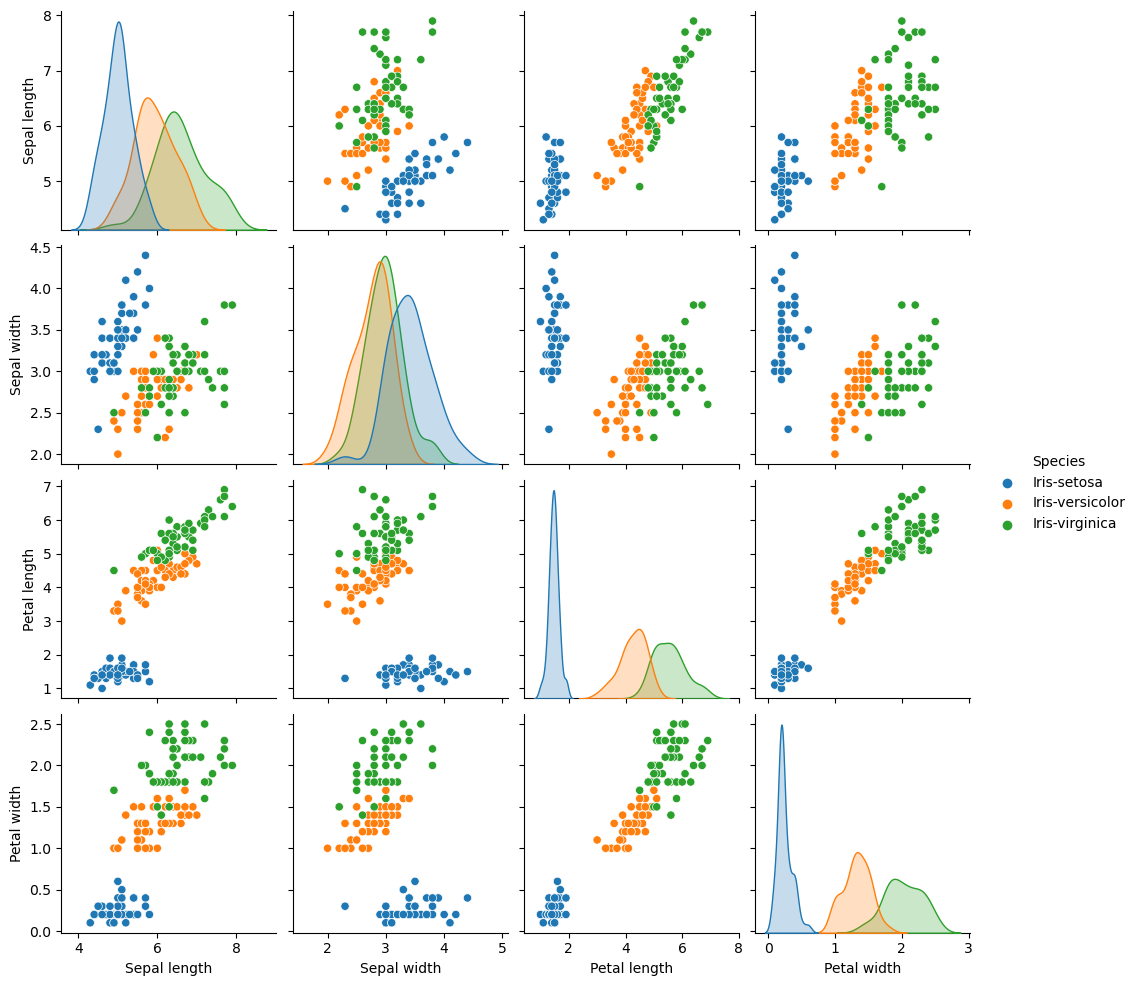

In [5]:
sns.pairplot(data, hue='Species')

In [6]:
df = data.values
X = df[:,0:4]
Y = df[:,4]

In [7]:
# Calculate average of each features for all classes
Y_Data = np.array([np.average(X[:, i][Y==j].astype('float32')) for i in range (X.shape[1])
 for j in (np.unique(Y))])
Y_reshaped = Y_Data.reshape(4, 3)
Y_reshaped = np.swapaxes(Y_reshaped, 0, 1)
X_axis = np.arange(len(cols)-1)
width = 0.25

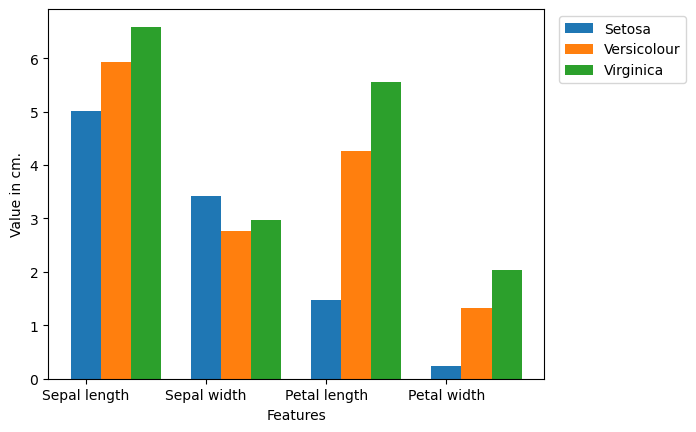

In [8]:
# Plot the average
plt.bar(X_axis, Y_reshaped[0], width, label = 'Setosa')
plt.bar(X_axis+width, Y_reshaped[1], width, label = 'Versicolour')
plt.bar(X_axis+width*2, Y_reshaped[2], width, label = 'Virginica')
plt.xticks(X_axis, cols[:4])
plt.xlabel("Features")
plt.ylabel("Value in cm.")
plt.legend(bbox_to_anchor=(1.3,1))
plt.show()

In [9]:
#train and test dataset

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [10]:
# Support vector classifier

from sklearn.svm import SVC
svn = SVC()
svn.fit(X_train, y_train)

SVC()

In [11]:
#model evaluation

pred = svn.predict(X_test)
# Calc accuracy

from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred)

0.9

In [12]:
from sklearn.metrics import classification_report

print(classification_report(y_test, pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         6
Iris-versicolor       0.90      0.82      0.86        11
 Iris-virginica       0.86      0.92      0.89        13

       accuracy                           0.90        30
      macro avg       0.92      0.91      0.92        30
   weighted avg       0.90      0.90      0.90        30



In [15]:
#model testing

X_new = np.array([[3, 2, 1, 0.2], [  4.9, 2.2, 3.8, 1.1 ], [  6.3, 3.5, 5.6, 2.9 ]])

#Prediction of the species from the input vector

prediction = svn.predict(X_new)
print("Prediction of Species: {}".format(prediction))

Prediction of Species: ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


### This shows that setosa is the shortest and virginica is the longest . So the prediction is correct.